# Assignment 1: MNIST Handwriting Classification
   ##### Name: Ruchita Nagare | Andrew ID: rnagare

## Reading and vectorizing the data

In [2]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with gzip.open('Dataset/train-images-idx3-ubyte.gz','r') as f:
    f.read(16)
    buf = f.read(28 * 28 * 60000)
    X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

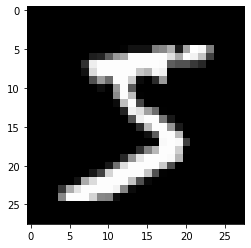

In [3]:
plt.imshow(X_train[0].reshape((28,28)), cmap = 'gray')
plt.show()

In [4]:
with gzip.open('Dataset/train-labels-idx1-ubyte.gz','r') as f:
    f.read(8)
    buf = f.read(60000)
    Y_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
Y_train = Y_train.reshape(60000)
Y_train.shape

(60000,)

In [5]:
Y_train


array([5., 0., 4., ..., 5., 6., 8.], dtype=float32)

In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
with gzip.open('Dataset/t10k-images-idx3-ubyte.gz','r') as f:
    f.read(16)
    buf = f.read(28 * 28 * 10000)
    X_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_test = X_test.reshape(10000, 28 * 28)
X_test.shape

(10000, 784)

In [8]:
with gzip.open('Dataset/t10k-labels-idx1-ubyte.gz','r') as f:
    f.read(8)
    buf = f.read(10000)
    Y_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
Y_test = Y_test.reshape(10000)
Y_test.shape

(10000,)

## Naives Bayes Model

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

In [10]:
%%time 
clf_mnb = mnb.fit(X_train, Y_train)

# Capturing the time required to train the model

Wall time: 1.17 s


In [11]:
Y_pred = clf_mnb.predict(X_test)

###### Evaluating the model's performance

In [12]:
# Accuracy score

print('AUC: %0.5f' % accuracy_score(Y_test, Y_pred))

AUC: 0.83650


In [13]:
clf_mnb.score(X_test, Y_test)


0.8365

In [14]:
# Classification Report

from sklearn.metrics import classification_report
predictions = clf_mnb.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       980
         1.0       0.91      0.93      0.92      1135
         2.0       0.90      0.83      0.86      1032
         3.0       0.80      0.84      0.82      1010
         4.0       0.84      0.75      0.79       982
         5.0       0.86      0.66      0.75       892
         6.0       0.89      0.90      0.89       958
         7.0       0.94      0.84      0.88      1028
         8.0       0.66      0.80      0.72       974
         9.0       0.71      0.86      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [24]:
# Defining a method to display predicted images with their labels

def plot_images(images, label):
    no_cols = min(5, len(images))
    no_rows = len(images) // no_cols
    fig = plt.figure(figsize = (8,8))
    
    for i in range(no_rows*no_cols):
        sp = fig.add_subplot(no_rows, no_cols, i+1)
        plt.axis("off")
        plt.imshow(images[i], cmap = plt.cm.gray)
        sp.set_title(int((label[i])))
    plt.show()

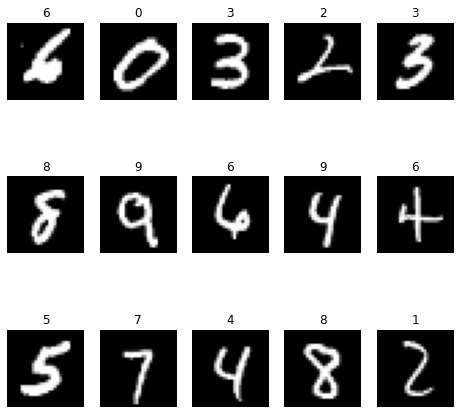

In [25]:
# Plotting those images

p = np.random.permutation(len(X_test))
p = p[:15]
plot_images(X_test[p].reshape(-1,28,28), predictions[p])


# It can be noticed that there is an instance where the model wrongly predicts the actual number 9 as 4, 4 as 6, 2 as 1.

In [17]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[ 912    0    2    6    1    8   14    1   36    0]
 [   0 1061    5    9    0    2    6    0   51    1]
 [  15   11  858   24   10    3   33   11   66    1]
 [   4   11   34  851    1   21    7   14   40   27]
 [   2    2    6    0  732    0   25    1   38  176]
 [  23   11    6  107   18  590   17    6   78   36]
 [  17   13   17    1    7   25  860    0   18    0]
 [   1   21   11    5   19    0    1  861   40   69]
 [   6   26   13   54   14   27    8    9  777   40]
 [   6    7    3   10   66   10    0   17   27  863]]


In [18]:
# Calculating the accuracy using the confusion matrix

def diagonal_sum(conf_matrix):
    sum = 0
    for i in range(10):
        for j in range(10):
            if(i==j):
                sum += conf_matrix[i,j]
    return sum

In [19]:
sum = diagonal_sum(conf_matrix)
print(sum)
print("Accuracy % : ", sum/10000)

8365
Accuracy % :  0.8365


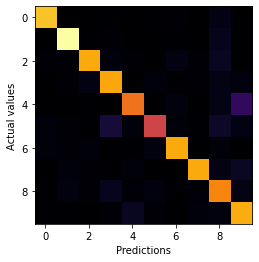

In [20]:
# Visualizing the confusion matrix

plt.imshow(conf_matrix, cmap = 'inferno', interpolation = 'nearest')
plt.xlabel('Predictions')
plt.ylabel('Actual values')
plt.show()

###### Saving the model to nb.model

In [23]:
import pickle

pickle.dump(clf_mnb, open('nb.model', 'wb'))

## Logistic Regression

In [26]:
# Scaling the input data around a standard mean using StandardScalar

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True,
                        multi_class='multinomial',
                        penalty='l2', 
                        solver='saga',
                        tol = 0.01,
                        max_iter=50,
                        random_state = 0,
                        class_weight = 'balanced')

In [28]:
%%time
lr.fit(X_train, Y_train)

# Capturing the time required to train the model

Wall time: 1min 17s


LogisticRegression(class_weight='balanced', max_iter=50,
                   multi_class='multinomial', random_state=0, solver='saga',
                   tol=0.01)

In [29]:
Y_pred = lr.predict(X_test)

###### Evaluating the model's performance

In [30]:
lr.score(X_train, Y_train)

0.9158666666666667

In [31]:
# Accuracy score

print('AUC: %0.5f' % accuracy_score(Y_test, Y_pred))

AUC: 0.91560


In [32]:
lr.score(X_test, Y_test)

0.9156

In [33]:
# Classification report

predictions = lr.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       980
         1.0       0.94      0.97      0.96      1135
         2.0       0.93      0.88      0.91      1032
         3.0       0.91      0.90      0.91      1010
         4.0       0.90      0.94      0.92       982
         5.0       0.89      0.87      0.88       892
         6.0       0.93      0.95      0.94       958
         7.0       0.92      0.91      0.91      1028
         8.0       0.88      0.86      0.87       974
         9.0       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



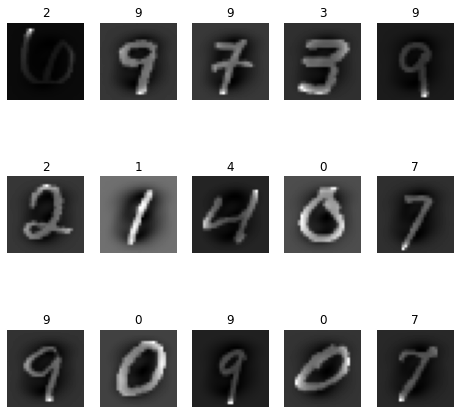

In [36]:
# Plotting the predicted images

p = np.random.permutation(len(X_test))
p = p[:15]
plot_images(X_test[p].reshape(-1,28,28), predictions[p])

# It can be observed that there is an instance where the model wrongly predicts the actual number 6 as 2, 9 as 3

In [37]:
# Confusion Matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[ 959    0    0    1    0    7    8    2    3    0]
 [   0 1104    2    2    1    3    4    0   19    0]
 [  10   12  910   16   12    3   13   16   35    5]
 [   4    2   19  909    4   28    3   15   18    8]
 [   2    5    5    0  922    1   12    2    4   29]
 [   9    5    2   29   11  776   17   10   25    8]
 [  13    3    5    1    7   13  912    2    2    0]
 [   3   16   23    5    9    0    1  936    0   35]
 [  11   15    8   19   16   32   11   13  834   15]
 [  13    8    1   13   44    8    0   22    6  894]]


In [38]:
# Calculating the accuracy using the confusion matrix

sum = diagonal_sum(conf_matrix)
print(sum)
print("Accuracy % : ", sum/10000)

9156
Accuracy % :  0.9156


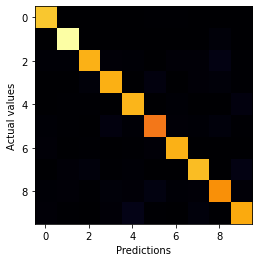

In [39]:
# Visualizing the confusion matrix

plt.imshow(conf_matrix, cmap = 'inferno', interpolation = 'nearest')
plt.xlabel('Predictions')
plt.ylabel('Actual values')
plt.show()

###### Saving the model to lr.model

In [40]:
import pickle

pickle.dump(lr, open('lr.model', 'wb'))